In [190]:
import pandas as pd
import matplotlib.pyplot as plt

In [191]:
data = pd.read_csv("RT_IOT2022.csv")
data = pd.DataFrame(data)
data.head()

,no,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
0,0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish
3,3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish
4,4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,MQTT_Publish


In [192]:
data = data.set_index("no")

In [193]:
data.head()

,id.orig_p,id.resp_p,proto,service,flow_duration,fwd_pkts_tot,bwd_pkts_tot,fwd_data_pkts_tot,bwd_data_pkts_tot,fwd_pkts_per_sec,...,active.std,idle.min,idle.max,idle.tot,idle.avg,idle.std,fwd_init_window_size,bwd_init_window_size,fwd_last_window_size,Attack_type
no,,,,,,,,,,,,,,,,,,,,,
0,38667,1883,tcp,mqtt,32.011598,9,5,3,3,0.281148,...,0.0,2.972918e+07,2.972918e+07,2.972918e+07,2.972918e+07,0.0,64240,26847,502,MQTT_Publish
1,51143,1883,tcp,mqtt,31.883584,9,5,3,3,0.282277,...,0.0,2.985528e+07,2.985528e+07,2.985528e+07,2.985528e+07,0.0,64240,26847,502,MQTT_Publish
2,44761,1883,tcp,mqtt,32.124053,9,5,3,3,0.280164,...,0.0,2.984215e+07,2.984215e+07,2.984215e+07,2.984215e+07,0.0,64240,26847,502,MQTT_Publish
3,60893,1883,tcp,mqtt,31.961063,9,5,3,3,0.281593,...,0.0,2.991377e+07,2.991377e+07,2.991377e+07,2.991377e+07,0.0,64240,26847,502,MQTT_Publish
4,51087,1883,tcp,mqtt,31.902362,9,5,3,3,0.282111,...,0.0,2.981470e+07,2.981470e+07,2.981470e+07,2.981470e+07,0.0,64240,26847,502,MQTT_Publish


In [194]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123117 entries, 0 to 2009
Data columns (total 84 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   id.orig_p                 123117 non-null  int64  
 1   id.resp_p                 123117 non-null  int64  
 2   proto                     123117 non-null  object 
 3   service                   123117 non-null  object 
 4   flow_duration             123117 non-null  float64
 5   fwd_pkts_tot              123117 non-null  int64  
 6   bwd_pkts_tot              123117 non-null  int64  
 7   fwd_data_pkts_tot         123117 non-null  int64  
 8   bwd_data_pkts_tot         123117 non-null  int64  
 9   fwd_pkts_per_sec          123117 non-null  float64
 10  bwd_pkts_per_sec          123117 non-null  float64
 11  flow_pkts_per_sec         123117 non-null  float64
 12  down_up_ratio             123117 non-null  float64
 13  fwd_header_size_tot       123117 non-null  int64  


In [195]:
data_rvst = data.iloc[:, [2, 3, 4, 9, 10, 59, 83]]
data_rvst

,proto,service,flow_duration,fwd_pkts_per_sec,bwd_pkts_per_sec,payload_bytes_per_second,Attack_type
no,,,,,,,
0,tcp,mqtt,32.011598,0.281148,0.156193,3.373777,MQTT_Publish
1,tcp,mqtt,31.883584,0.282277,0.156821,3.387323,MQTT_Publish
2,tcp,mqtt,32.124053,0.280164,0.155647,3.237450,MQTT_Publish
3,tcp,mqtt,31.961063,0.281593,0.156440,3.253959,MQTT_Publish
4,tcp,mqtt,31.902362,0.282111,0.156728,3.385329,MQTT_Publish
...,...,...,...,...,...,...,...
2005,tcp,-,0.000006,167772.160000,167772.160000,0.000000,NMAP_XMAS_TREE_SCAN
2006,tcp,-,0.000007,144631.172414,144631.172414,0.000000,NMAP_XMAS_TREE_SCAN
2007,tcp,-,0.000006,167772.160000,167772.160000,0.000000,NMAP_XMAS_TREE_SCAN


1. What is the distribution of the Attack_type classes (normal vs. various attacks), and what percentage of the 123,117 instances does each class comprise?

In [196]:
data_attack = data["Attack_type"].value_counts()
data_attack = pd.DataFrame(data_attack)
data_attack

,count
Attack_type,
DOS_SYN_Hping,94659
Thing_Speak,8108
ARP_poisioning,7750
MQTT_Publish,4146
NMAP_UDP_SCAN,2590
NMAP_XMAS_TREE_SCAN,2010
NMAP_OS_DETECTION,2000
NMAP_TCP_scan,1002
DDOS_Slowloris,534


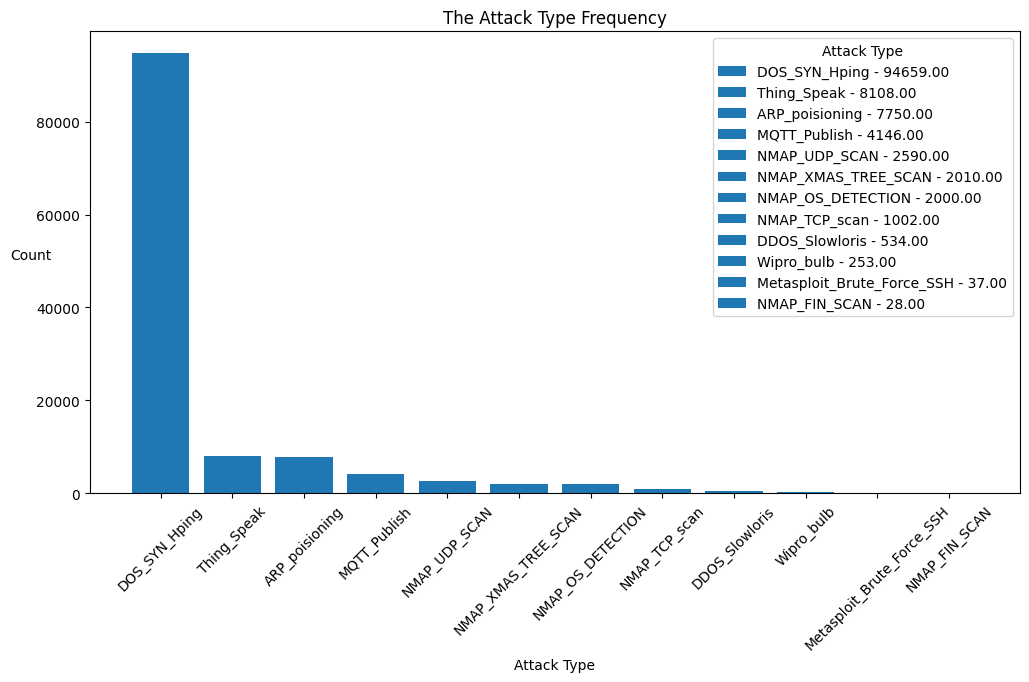

In [197]:
plt.figure(figsize = (12, 6))
labels = ["{0} - {1:1.2f}".format(i,j) for i,j in zip(data_attack.index, data_attack["count"].values)]
bars = plt.bar(data_attack.index, data_attack["count"].values)

plt.xlabel("Attack Type")
plt.xticks(rotation = 45)
plt.ylabel("Count", rotation = 0)

plt.title("The Attack Type Frequency")
for bar, label in zip(bars, labels):
    bar.set_label(label)
plt.legend(title = "Attack Type", loc = "upper right")
plt.show()

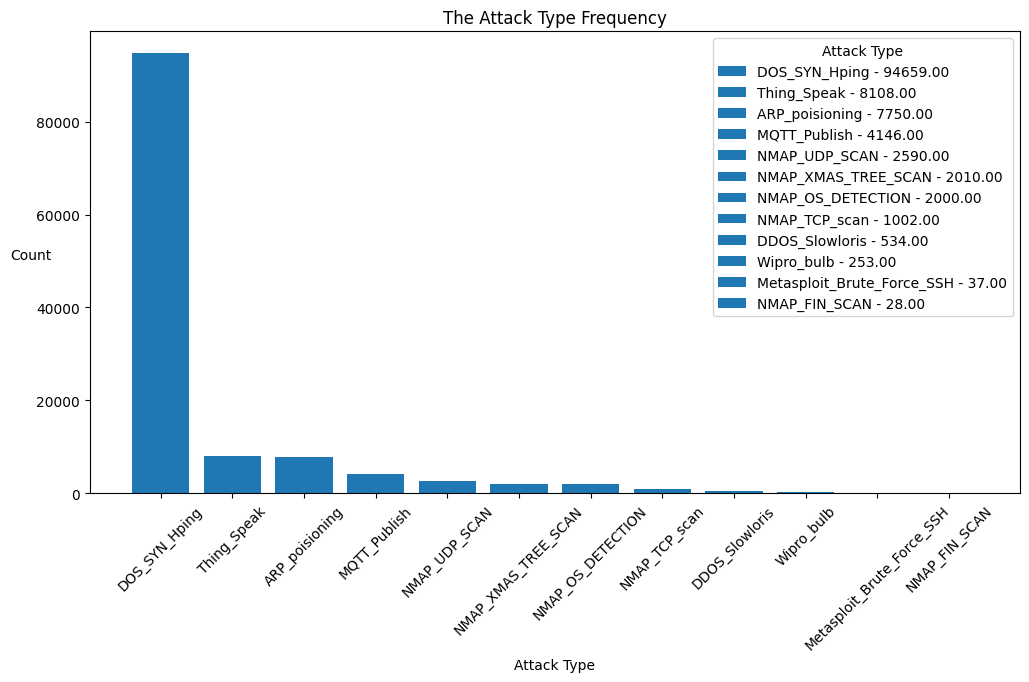

In [198]:
plt.figure(figsize = (12, 6))

labels = ["{0} - {1:1.2f}".format(i, j) for i, j in zip(data_attack.index, data_attack["count"].values)]
bars = plt.bar(data_attack.index, data_attack["count"].values)

plt.xlabel("Attack Type")
plt.xticks(rotation=45)
plt.ylabel("Count", rotation=0)

plt.title("The Attack Type Frequency")
for bar, label in zip(bars, labels):
    bar.set_label(label)
plt.legend(title="Attack Type", loc="upper right")
plt.show()

In [199]:
data_attack["percentage"] = (data_attack["count"]/data_attack["count"].sum()) * 100
data_attack

,count,percentage
Attack_type,,
DOS_SYN_Hping,94659,76.885402
Thing_Speak,8108,6.585606
ARP_poisioning,7750,6.294825
MQTT_Publish,4146,3.367528
NMAP_UDP_SCAN,2590,2.103690
NMAP_XMAS_TREE_SCAN,2010,1.632593
NMAP_OS_DETECTION,2000,1.624471
NMAP_TCP_scan,1002,0.813860
DDOS_Slowloris,534,0.433734


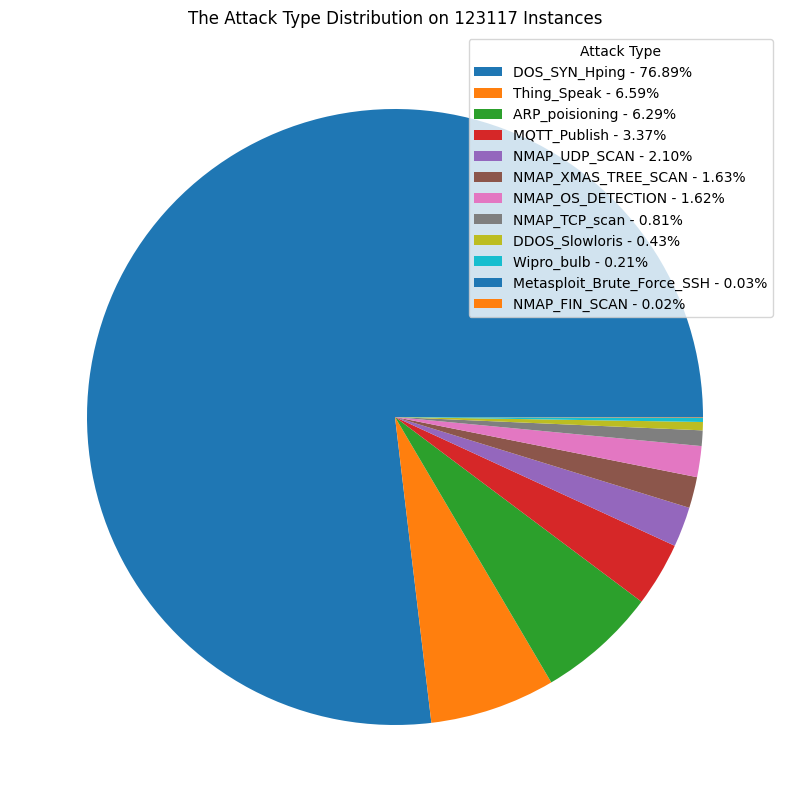

In [200]:
labels = ["{0} - {1:1.2f}%".format(i,j) for i,j in zip(data_attack["percentage"].index, data_attack["percentage"].values)]
plt.figure(figsize = (10, 10))
plt.pie(data_attack["percentage"].values)
plt.title("The Attack Type Distribution on 123117 Instances")
plt.legend(title = "Attack Type", labels = labels, loc = "upper right")
plt.show()

2. How do the categorical features proto (protocol) and service vary across different attack types and normal traffic patterns?

In [201]:
data["service"].replace({
    "-": "None"
}, inplace = True)

<ipython-input-201-567cac2b1c90>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["service"].replace({


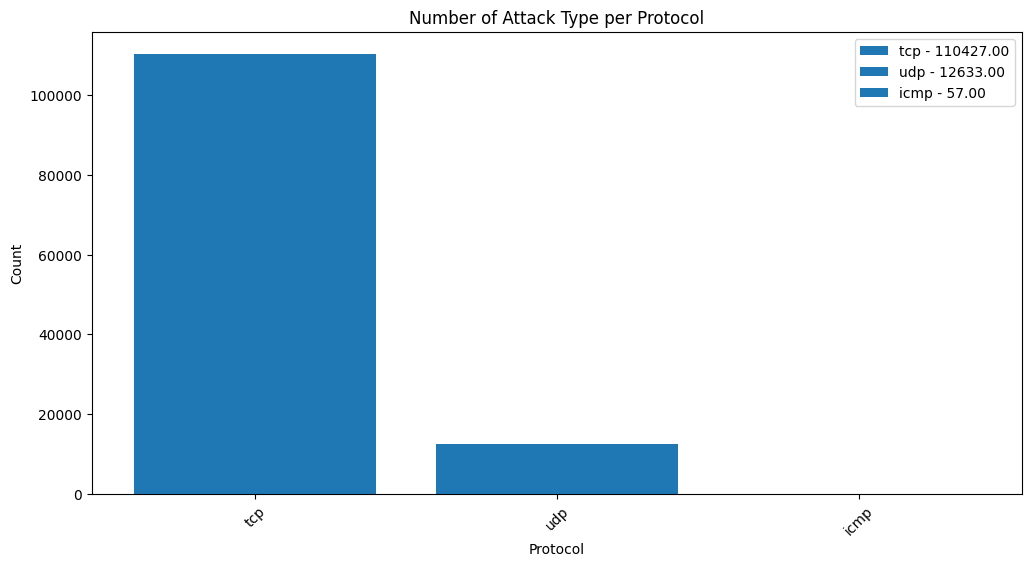

In [202]:
data_cat_1 = data.groupby("proto")["Attack_type"].count()
data_cat_1 = pd.DataFrame(data_cat_1)
data_cat_1 = data_cat_1.sort_values(["Attack_type"], ascending = False)

plt.figure(figsize = (12, 6))
labels = ["{0} - {1:1.2f}".format(i,j) for i,j in zip(data_cat_1.index, data_cat_1["Attack_type"].values)]
bars = plt.bar(data_cat_1.index, data_cat_1["Attack_type"].values)

plt.xlabel("Protocol")
plt.xticks(rotation = 45)
plt.ylabel("Count", rotation = 90)
plt.title("Number of Attack Type per Protocol")
for bar, label in zip(bars, labels):
    bar.set_label(label)
plt.legend()
plt.show()

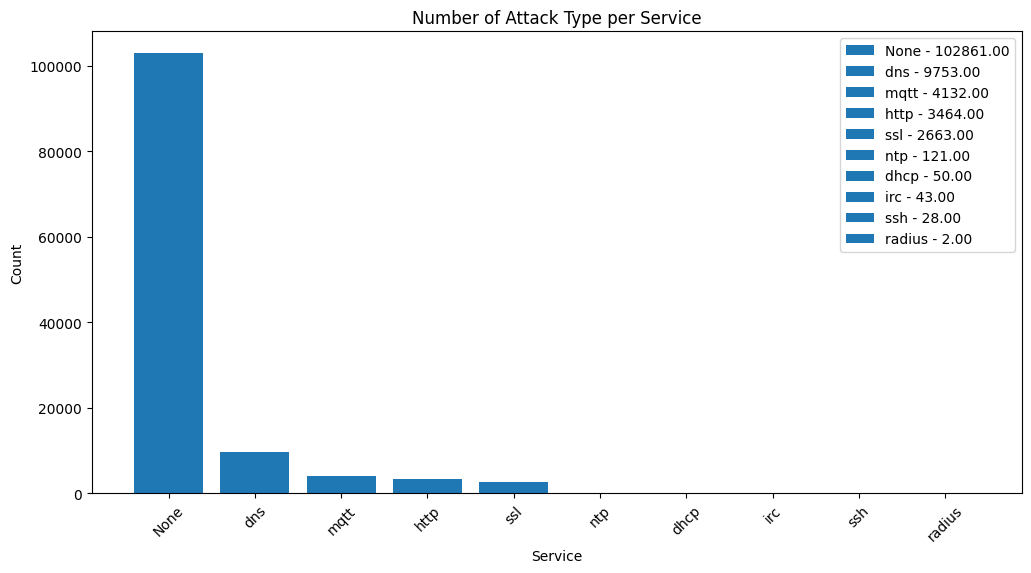

In [203]:
data_cat_2 = data.groupby("service")["Attack_type"].count()
data_cat_2 = pd.DataFrame(data_cat_2)
data_cat_2 = data_cat_2.sort_values(["Attack_type"], ascending = False)

plt.figure(figsize = (12, 6))
labels = ["{0} - {1:1.2f}".format(i,j) for i,j in zip(data_cat_2.index, data_cat_2["Attack_type"].values)]
bars = plt.bar(data_cat_2.index, data_cat_2["Attack_type"].values)

plt.xlabel("Service")
plt.xticks(rotation = 45)
plt.ylabel("Count", rotation = 90)
plt.title("Number of Attack Type per Service")
for bar, label in zip(bars, labels):
    bar.set_label(label)
plt.legend()
plt.show()

3. What are the mean and standard deviation of flow_duration for each Attack_type, and are differences statistically significant?

In [204]:
data_stat_sig = data.groupby(["Attack_type"])["flow_duration"].mean()
data_stat_sig = pd.DataFrame(data_stat_sig)

In [205]:
data_stat_sig["Standard Deviation"] = data.groupby("Attack_type")["flow_duration"].std()
data_stat_sig = data_stat_sig.rename(columns = {
    "flow_duration": "Mean"
})
data_stat_sig.index = data_stat_sig.index.set_names(["Attack Type"])
data_stat_sig = data_stat_sig.sort_values(["Mean", "Standard Deviation"], ascending = [False, False])
data_stat_sig

,Mean,Standard Deviation
Attack Type,,
Wipro_bulb,586.845727,2738.891637
MQTT_Publish,43.397013,24.341563
ARP_poisioning,15.893538,108.261070
DDOS_Slowloris,14.699148,14.124797
Metasploit_Brute_Force_SSH,3.006557,5.210286
Thing_Speak,0.934471,5.251602
NMAP_UDP_SCAN,0.737766,24.909755
NMAP_FIN_SCAN,0.023614,0.108791
NMAP_XMAS_TREE_SCAN,0.001171,0.050426


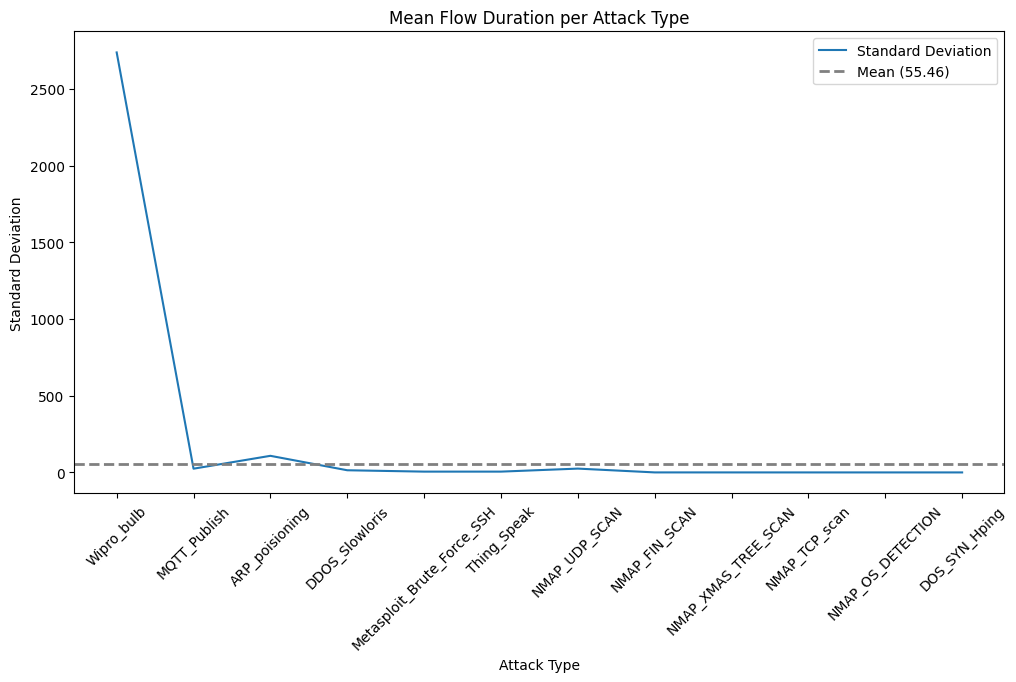

In [206]:
plt.figure(figsize=(12, 6))
plt.plot(data_stat_sig.index, data_stat_sig["Standard Deviation"].values, label="Standard Deviation")
plt.xlabel("Attack Type")
plt.xticks(rotation=45)
plt.ylabel("Standard Deviation")
mean_value = data_stat_sig["Mean"].mean()
plt.axhline(y=mean_value, color="gray", linestyle="--", linewidth=2, label=f"Mean ({mean_value:.2f})")
plt.title("Mean Flow Duration per Attack Type")
plt.legend()
plt.show()

4. Which continuous features (e.g., fwd_pkts_per_sec, bwd_pkts_per_sec, payload_bytes_per_second) exhibit the highest correlation with specific attack classes?

In [207]:
data_rvst.head()

,proto,service,flow_duration,fwd_pkts_per_sec,bwd_pkts_per_sec,payload_bytes_per_second,Attack_type
no,,,,,,,
0,tcp,mqtt,32.011598,0.281148,0.156193,3.373777,MQTT_Publish
1,tcp,mqtt,31.883584,0.282277,0.156821,3.387323,MQTT_Publish
2,tcp,mqtt,32.124053,0.280164,0.155647,3.237450,MQTT_Publish
3,tcp,mqtt,31.961063,0.281593,0.156440,3.253959,MQTT_Publish
4,tcp,mqtt,31.902362,0.282111,0.156728,3.385329,MQTT_Publish


In [208]:
data_rvst

,proto,service,flow_duration,fwd_pkts_per_sec,bwd_pkts_per_sec,payload_bytes_per_second,Attack_type
no,,,,,,,
0,tcp,mqtt,32.011598,0.281148,0.156193,3.373777,MQTT_Publish
1,tcp,mqtt,31.883584,0.282277,0.156821,3.387323,MQTT_Publish
2,tcp,mqtt,32.124053,0.280164,0.155647,3.237450,MQTT_Publish
3,tcp,mqtt,31.961063,0.281593,0.156440,3.253959,MQTT_Publish
4,tcp,mqtt,31.902362,0.282111,0.156728,3.385329,MQTT_Publish
...,...,...,...,...,...,...,...
2005,tcp,-,0.000006,167772.160000,167772.160000,0.000000,NMAP_XMAS_TREE_SCAN
2006,tcp,-,0.000007,144631.172414,144631.172414,0.000000,NMAP_XMAS_TREE_SCAN
2007,tcp,-,0.000006,167772.160000,167772.160000,0.000000,NMAP_XMAS_TREE_SCAN


In [209]:
data_rvst_corr = data_rvst.groupby("Attack_type")[["fwd_pkts_per_sec", "bwd_pkts_per_sec", "payload_bytes_per_second"]].corr()
round(data_rvst_corr, 4)

fwd_pkts_per_sec  \
Attack_type                                                             
ARP_poisioning             fwd_pkts_per_sec                    1.0000   
                           bwd_pkts_per_sec                    0.4813   
                           payload_bytes_per_second            0.4289   
DDOS_Slowloris             fwd_pkts_per_sec                    1.0000   
                           bwd_pkts_per_sec                   -0.1848   
                           payload_bytes_per_second            0.9991   
DOS_SYN_Hping              fwd_pkts_per_sec                    1.0000   
                           bwd_pkts_per_sec                    1.0000   
                           payload_bytes_per_second            1.0000   
MQTT_Publish               fwd_pkts_per_sec                    1.0000   
                           bwd_pkts_per_sec                    0.9823   
                           payload_bytes_per_second            0.0370   
Metasploit_Brute_Force_SSH fwd_pkts_per_sec                    1.0000   
                           bwd_pkts_per_sec                    1.0000   
                           payload_bytes_per_second            0.9983   
NMAP_FIN_SCAN              fwd_pkts_per_sec                    1.0000   
                           bwd_pkts_per_sec                    1.0000   
                           payload_bytes_per_second            0.9999   
NMAP_OS_DETECTION          fwd_pkts_per_sec                    1.0000   
                           bwd_pkts_per_sec                    1.0000   
                           payload_bytes_per_second               NaN   
NMAP_TCP_scan              fwd_pkts_per_sec                    1.0000   
                           bwd_pkts_per_sec                    1.0000   
                           payload_bytes_per_second           -0.0599   
NMAP_UDP_SCAN              fwd_pkts_per_sec                    1.0000   
                           bwd_pkts_per_sec                   -0.0030   
                           payload_bytes_per_second            0.9998   
NMAP_XMAS_TREE_SCAN        fwd_pkts_per_sec                    1.0000   
                           bwd_pkts_per_sec                    1.0000   
                           payload_bytes_per_second           -0.0261   
Thing_Speak                fwd_pkts_per_sec                    1.0000   
                           bwd_pkts_per_sec                    0.7215   
                           payload_bytes_per_second            0.7758   
Wipro_bulb                 fwd_pkts_per_sec                    1.0000   
                           bwd_pkts_per_sec                   -0.0106   
                           payload_bytes_per_second            0.8457   

                                                     bwd_pkts_per_sec  \
Attack_type                                                             
ARP_poisioning             fwd_pkts_per_sec                    0.4813   
                           bwd_pkts_per_sec                    1.0000   
                           payload_bytes_per_second            0.8931   
DDOS_Slowloris             fwd_pkts_per_sec                   -0.1848   
                           bwd_pkts_per_sec                    1.0000   
                           payload_bytes_per_second           -0.1422   
DOS_SYN_Hping              fwd_pkts_per_sec                    1.0000   
                           bwd_pkts_per_sec                    1.0000   
                           payload_bytes_per_second            1.0000   
MQTT_Publish               fwd_pkts_per_sec                    0.9823   
                           bwd_pkts_per_sec                    1.0000   
                           payload_bytes_per_second            0.2229   
Metasploit_Brute_Force_SSH fwd_pkts_per_sec                    1.0000   
                           bwd_pkts_per_sec                    1.0000   
                           payload_bytes_per_second            0.9983   
NMAP_FIN_SCAN              fwd_pkts_p

In [210]:
data_rvst_corr = pd.DataFrame(data_rvst_corr)

# Get the highest correlated feature for each attack type
highest_corr_feature = data_rvst_corr.idxmax(axis = 1)
highest_corr_value = data_rvst_corr.max(axis = 1)

# Combine
data_rvst_corr = pd.DataFrame({
    "Most Correlated Feature": highest_corr_feature,
    "Correlation Value": highest_corr_value
})

data_rvst_corr

<ipython-input-210-5322aed8853b>:4: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  highest_corr_feature = data_rvst_corr.idxmax(axis = 1)


Most Correlated Feature  \
Attack_type                                                                     
ARP_poisioning             fwd_pkts_per_sec                  fwd_pkts_per_sec   
                           bwd_pkts_per_sec                  bwd_pkts_per_sec   
                           payload_bytes_per_second  payload_bytes_per_second   
DDOS_Slowloris             fwd_pkts_per_sec                  fwd_pkts_per_sec   
                           bwd_pkts_per_sec                  bwd_pkts_per_sec   
                           payload_bytes_per_second  payload_bytes_per_second   
DOS_SYN_Hping              fwd_pkts_per_sec          payload_bytes_per_second   
                           bwd_pkts_per_sec          payload_bytes_per_second   
                           payload_bytes_per_second          fwd_pkts_per_sec   
MQTT_Publish               fwd_pkts_per_sec                  fwd_pkts_per_sec   
                           bwd_pkts_per_sec                  bwd_pkts_per_sec   
                           payload_bytes_per_second  payload_bytes_per_second   
Metasploit_Brute_Force_SSH fwd_pkts_per_sec                  fwd_pkts_per_sec   
                           bwd_pkts_per_sec                  bwd_pkts_per_sec   
                           payload_bytes_per_second  payload_bytes_per_second   
NMAP_FIN_SCAN              fwd_pkts_per_sec                  fwd_pkts_per_sec   
                           bwd_pkts_per_sec                  bwd_pkts_per_sec   
                           payload_bytes_per_second  payload_bytes_per_second   
NMAP_OS_DETECTION          fwd_pkts_per_sec                  fwd_pkts_per_sec   
                           bwd_pkts_per_sec                  fwd_pkts_per_sec   
                           payload_bytes_per_second                       NaN   
NMAP_TCP_scan              fwd_pkts_per_sec                  fwd_pkts_per_sec   
                           bwd_pkts_per_sec                  bwd_pkts_per_sec   
                           payload_bytes_per_second  payload_bytes_per_second   
NMAP_UDP_SCAN              fwd_pkts_per_sec                  fwd_pkts_per_sec   
                           bwd_pkts_per_sec                  bwd_pkts_per_sec   
                           payload_bytes_per_second  payload_bytes_per_second   
NMAP_XMAS_TREE_SCAN        fwd_pkts_per_sec                  fwd_pkts_per_sec   
                           bwd_pkts_per_sec                  bwd_pkts_per_sec   
                           payload_bytes_per_second  payload_bytes_per_second   
Thing_Speak                fwd_pkts_per_sec                  fwd_pkts_per_sec   
                           bwd_pkts_per_sec                  bwd_pkts_per_sec   
                           payload_bytes_per_second  payload_bytes_per_second   
Wipro_bulb                 fwd_pkts_per_sec                  fwd_pkts_per_sec   
                           bwd_pkts_per_sec                  bwd_pkts_per_sec   
                           payload_bytes_per_second  payload_bytes_per_second   

                                                     Correlation Value  
Attack_type                                                             
ARP_poisioning             fwd_pkts_per_sec                        1.0  
                           bwd_pkts_per_sec                        1.0  
                           payload_bytes_per_second                1.0  
DDOS_Slowloris             fwd_pkts_per_sec                        1.0  
                           bwd_pkts_per_sec                        1.0  
                           payload_bytes_per_second                1.0  
DOS_SYN_Hping              fwd_pkts_per_sec                        1.0  
                           bwd_pkts_per_sec                        1.0  
                           payload_bytes_per_second                1.0  
MQTT_Publish               fwd_pkts_per_sec                        1.0  
                           bwd_pkts_per_sec                        1.0  
                          

5. How do time‑based features like fwd_iat.avg and bwd_iat.avg (mean inter‑arrival times) differ between various attack types and normal traffic?

In [211]:
data_iat = data.iloc[:, [47, 52, 83]]
data_iat.head()

,fwd_iat.avg,bwd_iat.avg,Attack_type
no,,,
0,4.001450e+06,506597.757339,MQTT_Publish
1,3.985448e+06,469065.248966,MQTT_Publish
2,4.015507e+06,503442.466259,MQTT_Publish
3,3.995133e+06,470946.013927,MQTT_Publish
4,3.987795e+06,483996.033669,MQTT_Publish


In [212]:
data_iat = data_iat.groupby("Attack_type")[["fwd_iat.avg", "bwd_iat.avg"]].mean()
data_iat = data_iat.sort_values(["fwd_iat.avg", "bwd_iat.avg"], ascending = [False, False])
data_iat.index = data_iat.index.set_names(["Attack Type"])
data_iat = pd.DataFrame(data_iat)
round(data_iat, 2)

,fwd_iat.avg,bwd_iat.avg
Attack Type,,
MQTT_Publish,4941675.20,522207.23
DDOS_Slowloris,2660822.69,2523957.94
Wipro_bulb,2093046.88,2037756.30
ARP_poisioning,744345.54,766425.61
Metasploit_Brute_Force_SSH,431322.70,910038.34
Thing_Speak,118623.23,97260.68
NMAP_UDP_SCAN,14364.67,178.69
NMAP_FIN_SCAN,4114.73,6539.12
NMAP_XMAS_TREE_SCAN,187.43,171.65


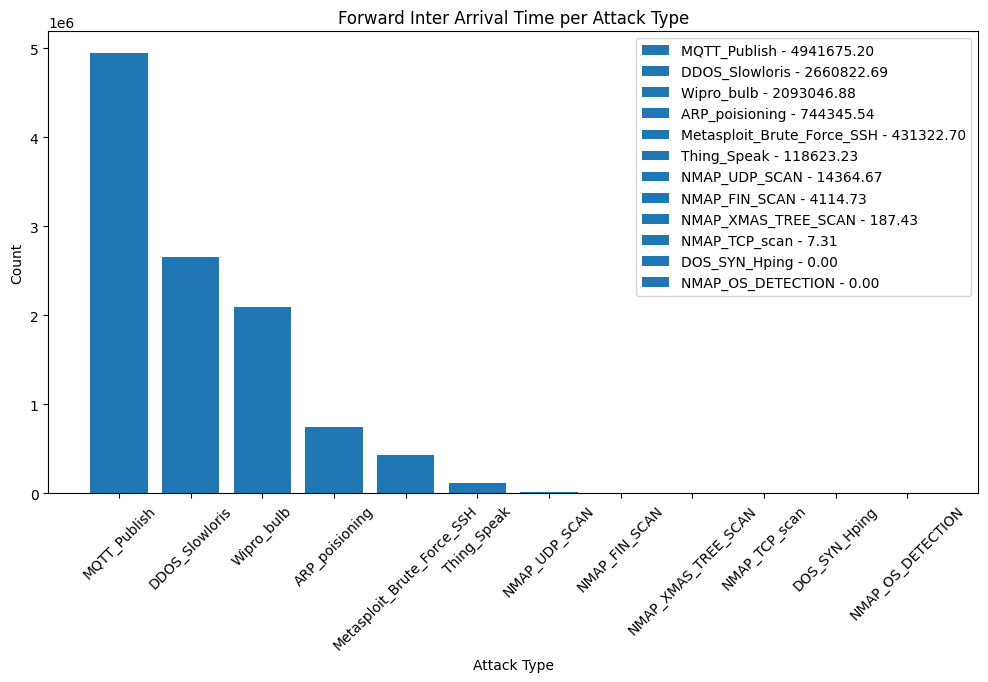

In [213]:
plt.figure(figsize = (12, 6))
labels = ["{0} - {1:1.2f}".format(i,j) for i,j in zip(data_iat.index, data_iat["fwd_iat.avg"].values)]
bars = plt.bar(data_iat.index, data_iat["fwd_iat.avg"].values)

plt.xlabel("Attack Type")
plt.xticks(rotation = 45)
plt.ylabel("Count", rotation = 90)
plt.title("Forward Inter Arrival Time per Attack Type")
for bar, label in zip(bars, labels):
    bar.set_label(label)
plt.legend()
plt.show()

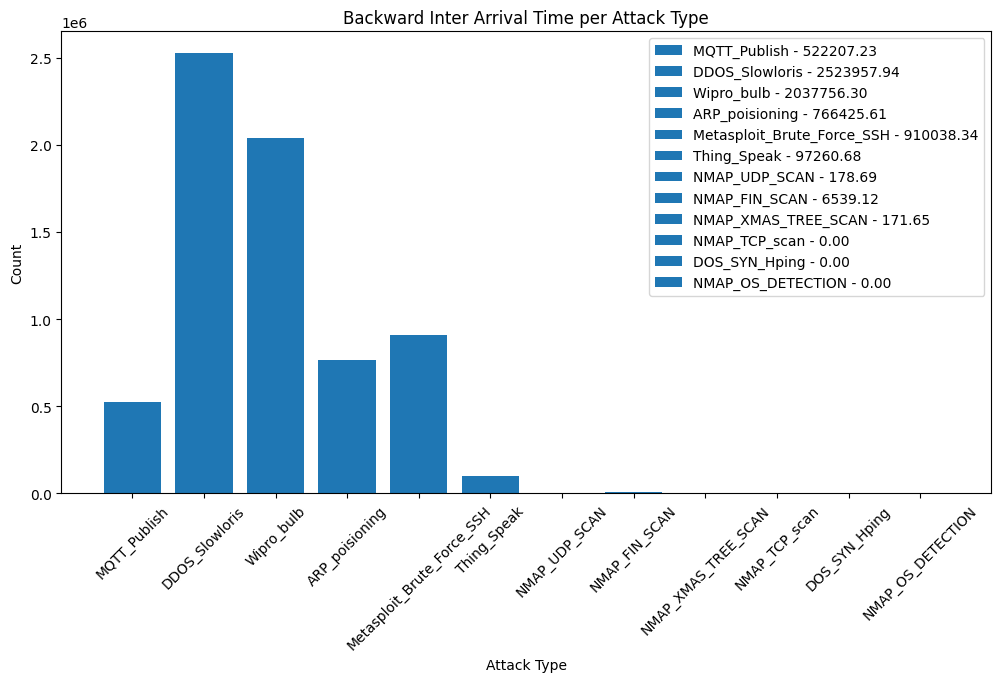

In [214]:
plt.figure(figsize = (12, 6))
labels = ["{0} - {1:1.2f}".format(i,j) for i,j in zip(data_iat.index, data_iat["bwd_iat.avg"].values)]
bars = plt.bar(data_iat.index, data_iat["bwd_iat.avg"].values)

plt.xlabel("Attack Type")
plt.xticks(rotation = 45)
plt.ylabel("Count", rotation = 90)
plt.title("Backward Inter Arrival Time per Attack Type")
for bar, label in zip(bars, labels):
    bar.set_label(label)
plt.legend()
plt.show()

[]

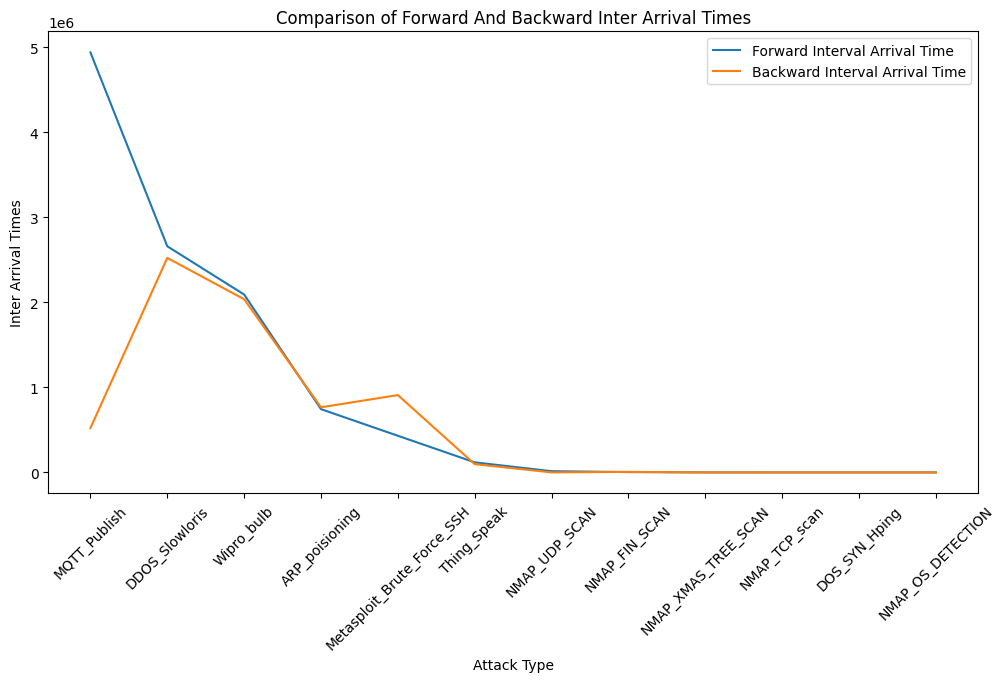

In [215]:
# Modified Inter Arrival Time (A Comparison of Forward And Backward Inter Arrival Times)

plt.figure(figsize = (12, 6))

fwd = plt.plot(data_iat.index, data_iat["fwd_iat.avg"].values)
bwd = plt.plot(data_iat.index, data_iat["bwd_iat.avg"].values)
labels = ('Forward Interval Arrival Time', 'Backward Interval Arrival Time')

plt.xlabel("Attack Type")
plt.xticks(rotation = 45)
plt.ylabel("Inter Arrival Times")
plt.title("Comparison of Forward And Backward Inter Arrival Times")
plt.legend(labels = labels)
plt.plot()

6. Which network flag counts (e.g., flow_SYN_flag_count, flow_RST_flag_count, fwd_PSH_flag_count) are most indicative of specific intrusion patterns?

In [216]:
data_ind = data.iloc[:, [20, 21, 22, 83]]
data_ind.head()

,flow_SYN_flag_count,flow_RST_flag_count,fwd_PSH_flag_count,Attack_type
no,,,,
0,2,1,3,MQTT_Publish
1,2,1,3,MQTT_Publish
2,2,1,3,MQTT_Publish
3,2,1,3,MQTT_Publish
4,2,1,3,MQTT_Publish


In [217]:
data_ind = data_ind.groupby("Attack_type")[["flow_SYN_flag_count", "flow_RST_flag_count", "fwd_PSH_flag_count"]].mean()
data_ind = data_ind.sort_values(["flow_SYN_flag_count", "flow_RST_flag_count", "fwd_PSH_flag_count"], ascending = [False, False, False])
data_ind.index = data_ind.index.set_names(["Attack Type"])

In [218]:
max_col_per_row = data_ind.idxmax(axis = 1)
max_val_per_row = data_ind.max(axis=1)
data_ind_max = pd.DataFrame({
    "Attack Type": data_ind.index,
    "Highest Network Flag": max_col_per_row,
    "Highest Mean Value": max_val_per_row
})

data_ind_max = data_ind_max.set_index("Attack Type")
data_ind_max = data_ind_max.sort_values(["Highest Mean Value"], ascending = 0)
round(data_ind_max, 2)

,Highest Network Flag,Highest Mean Value
Attack Type,,
Wipro_bulb,fwd_PSH_flag_count,10.58
Metasploit_Brute_Force_SSH,fwd_PSH_flag_count,5.03
MQTT_Publish,fwd_PSH_flag_count,2.99
DDOS_Slowloris,fwd_PSH_flag_count,2.95
ARP_poisioning,fwd_PSH_flag_count,1.95
Thing_Speak,fwd_PSH_flag_count,1.11
NMAP_TCP_scan,flow_SYN_flag_count,1.00
DOS_SYN_Hping,flow_SYN_flag_count,1.00
NMAP_OS_DETECTION,flow_RST_flag_count,1.00
